In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving bank-full.csv to bank-full.csv


In [3]:
import io
data = pd.read_csv('bank-full.csv', sep=";")
# Dataset is now stored in a Pandas Dataframe
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
print(f'Shape of dataset is {data.shape}')
data.info()

Shape of dataset is (45211, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


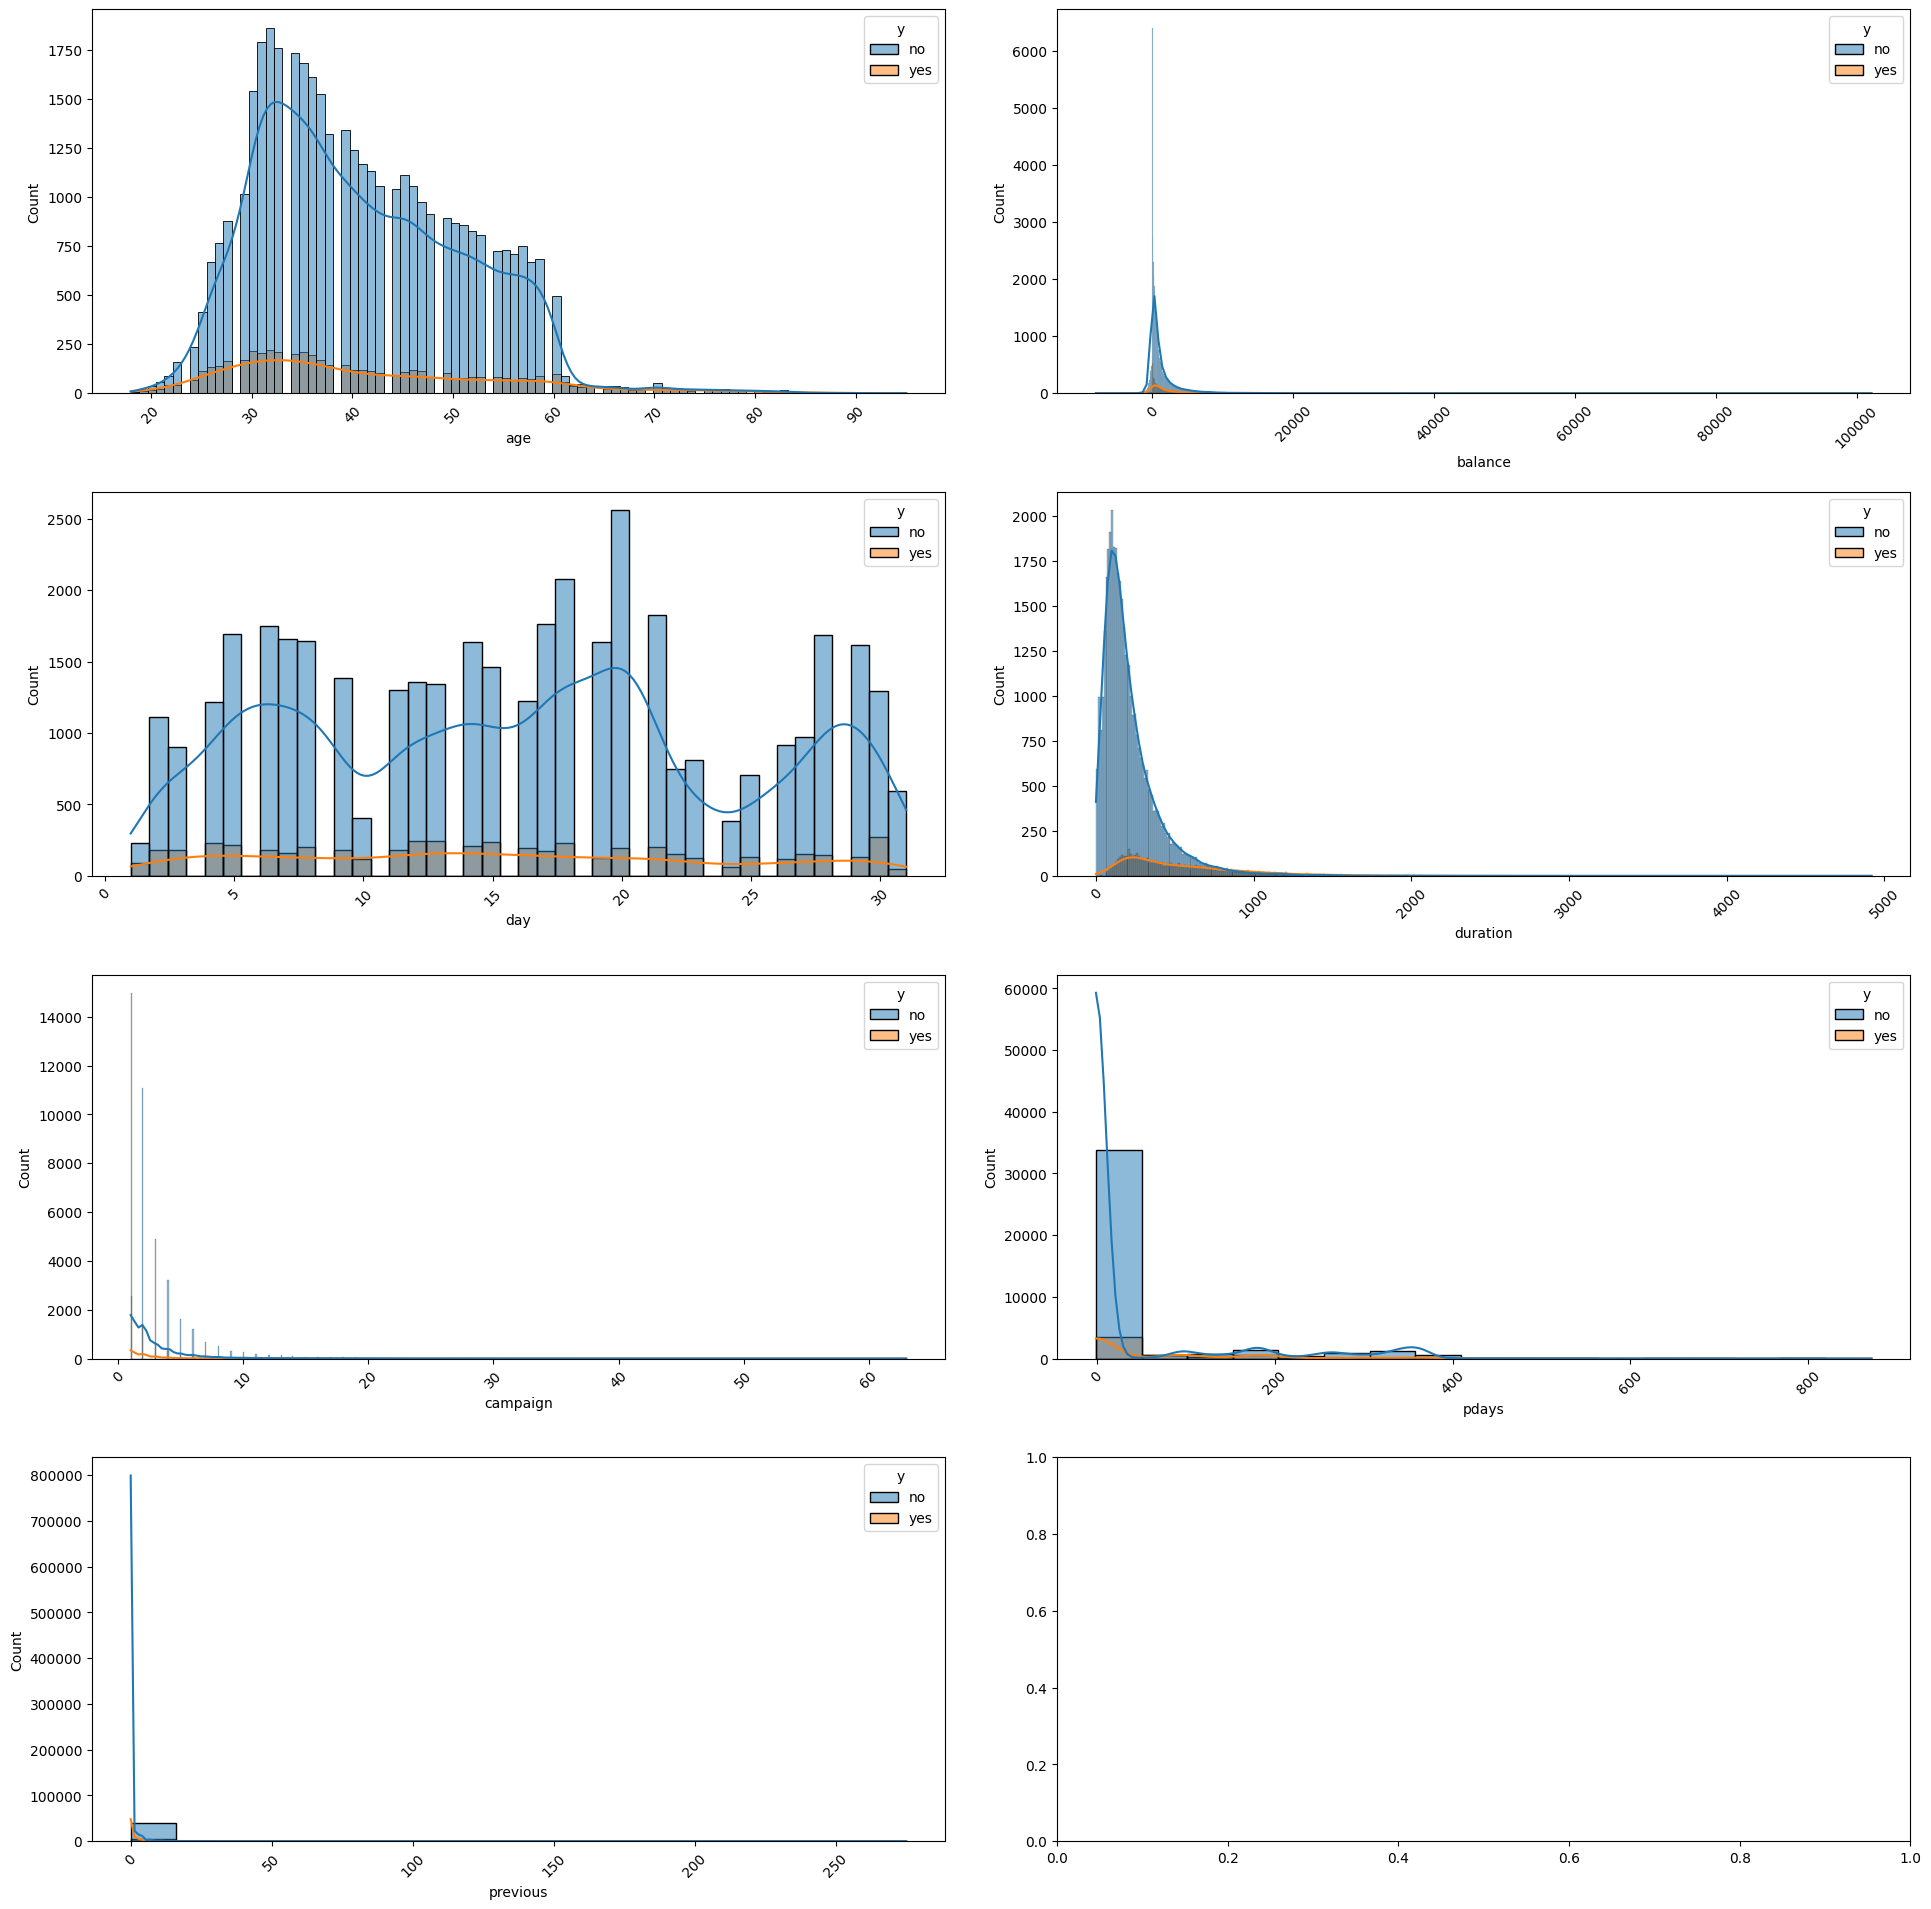

In [6]:
#histogram with KDE 
num_cols = [col for col in data.columns if data[col].dtype != object]
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
fig.tight_layout(pad=5.0)
for col, ax in zip(num_cols, axes.flatten()):
    dg=sns.histplot(x=col,data=data, hue='y', ax=ax, kde=True)
    ax.tick_params(axis='x', rotation=45)

age
balance
day
duration
campaign
pdays
previous


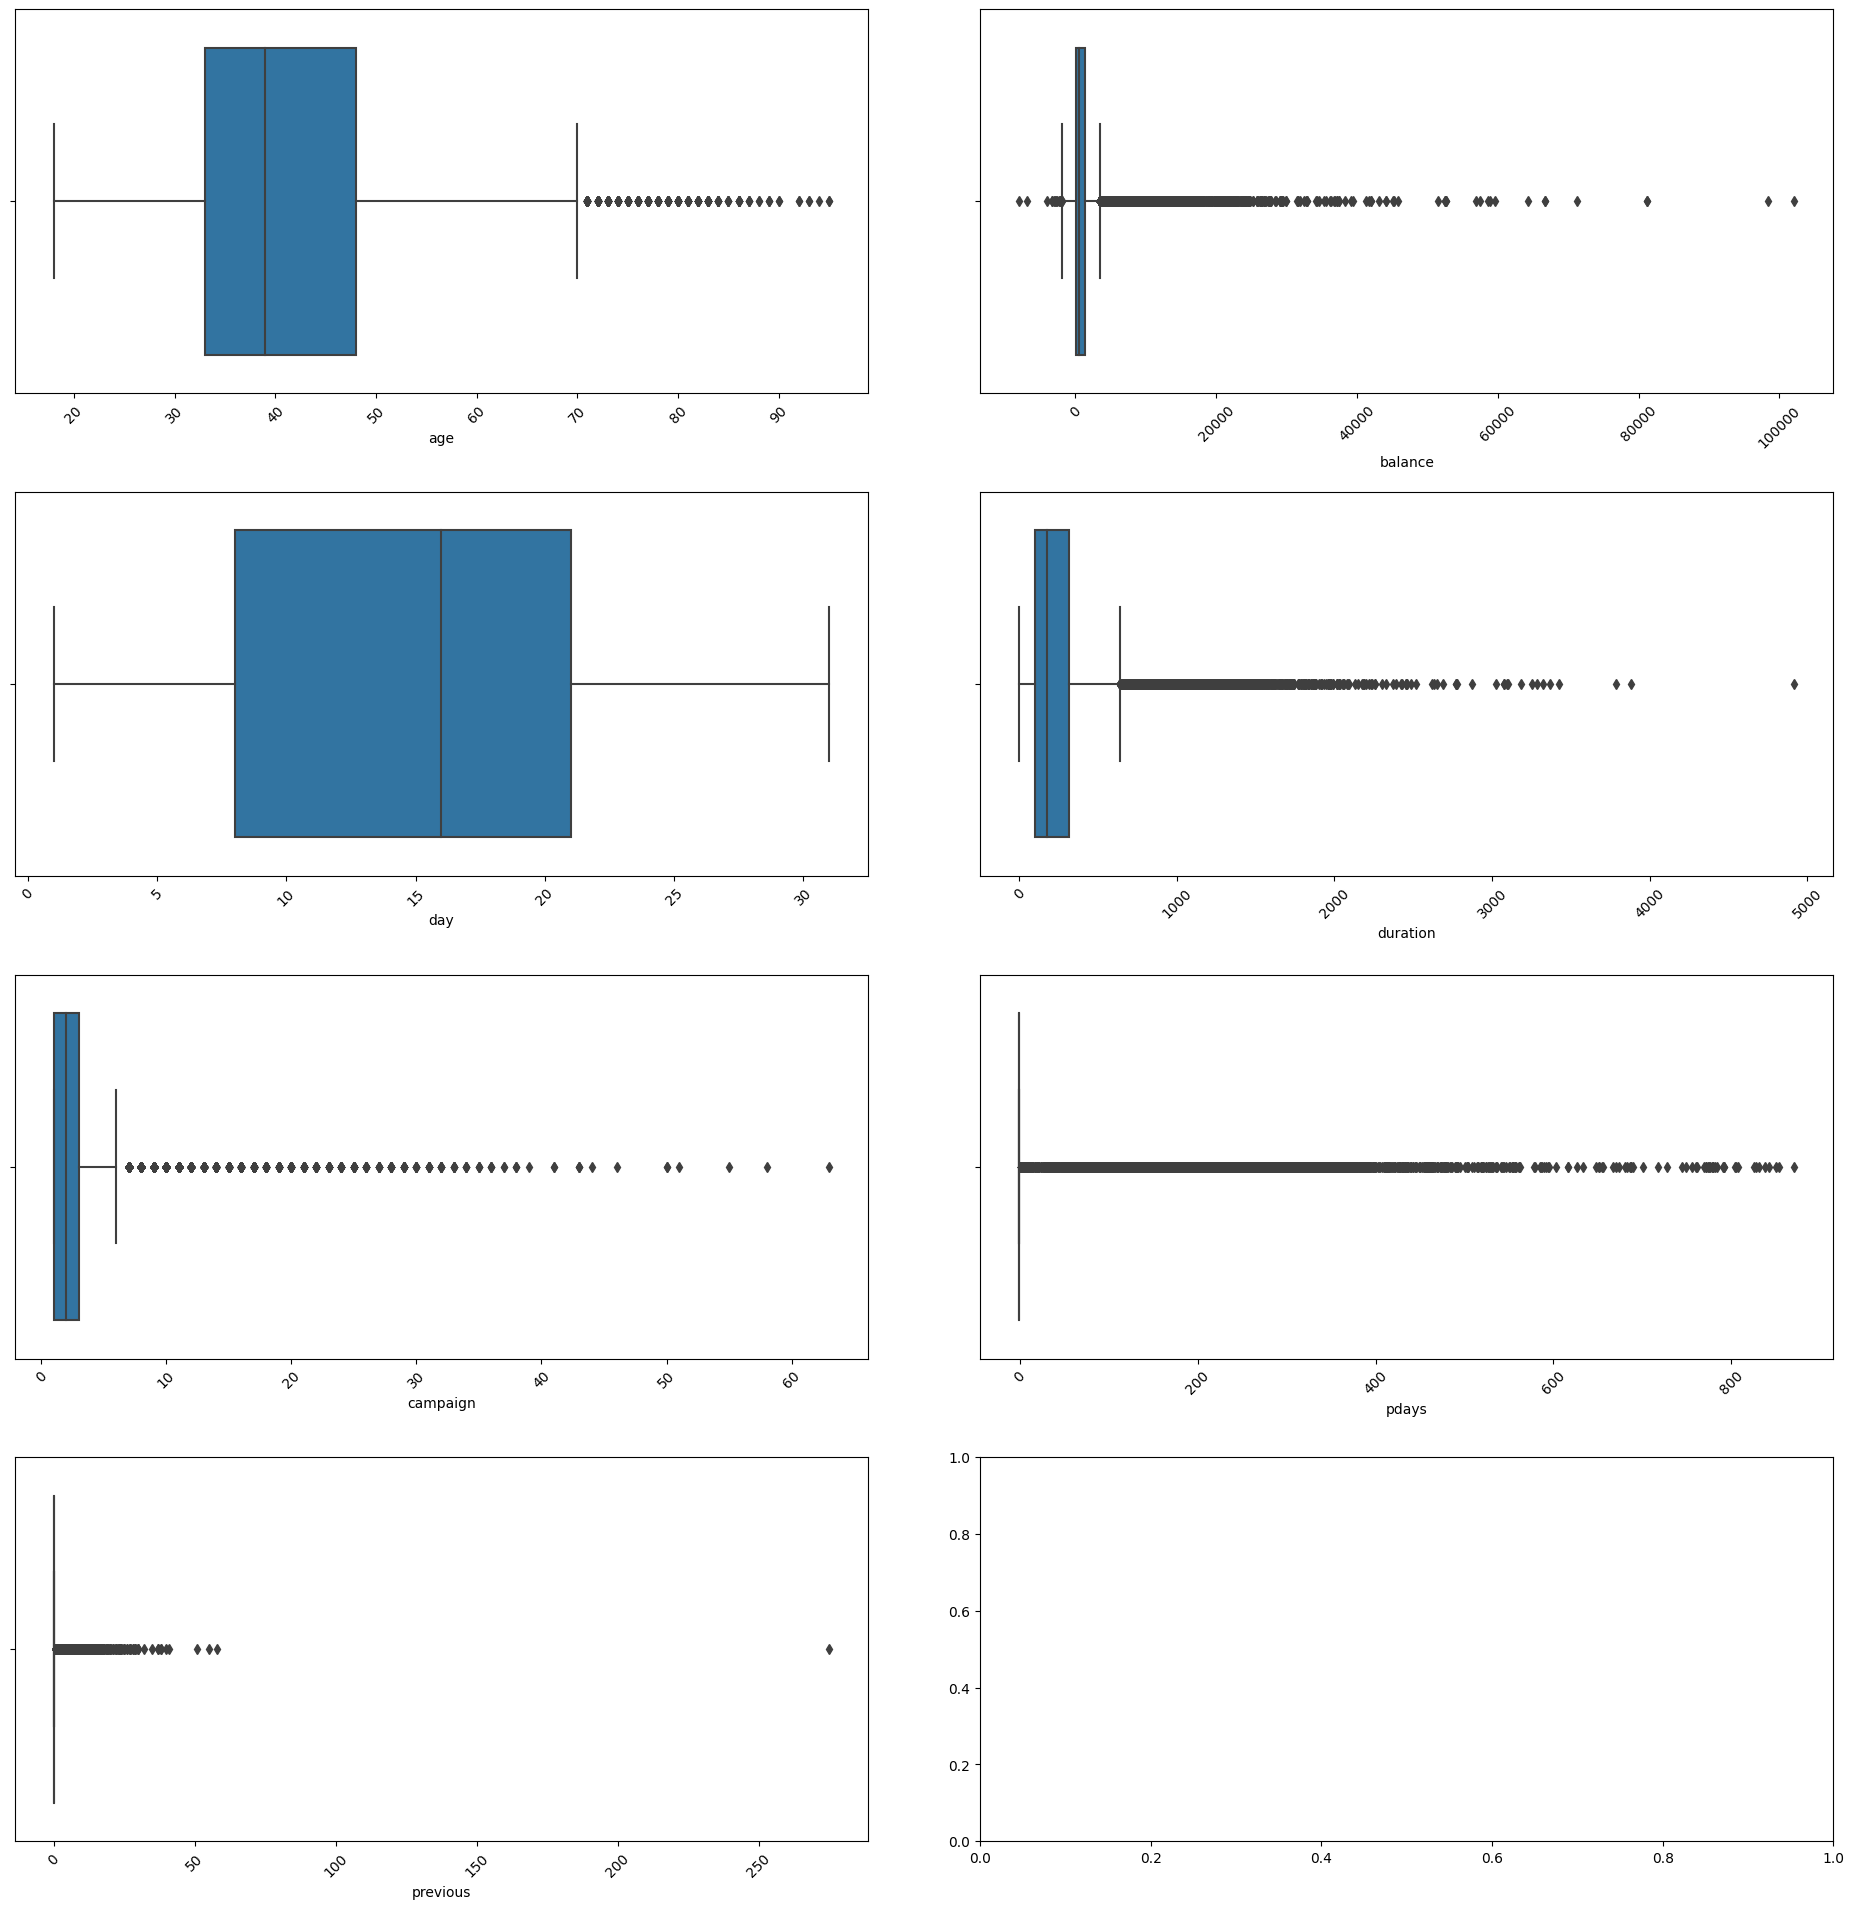

In [ ]:
#boxplot 
num_cols = [col for col in data.columns if data[col].dtype != object]
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
fig.tight_layout(pad=5.0)
for col, ax in zip(num_cols, axes.flatten()):
    print(col)
    sns.boxplot(x=col, data=data, hue='y', ax=ax)
    ax.tick_params(axis='x', rotation=45)


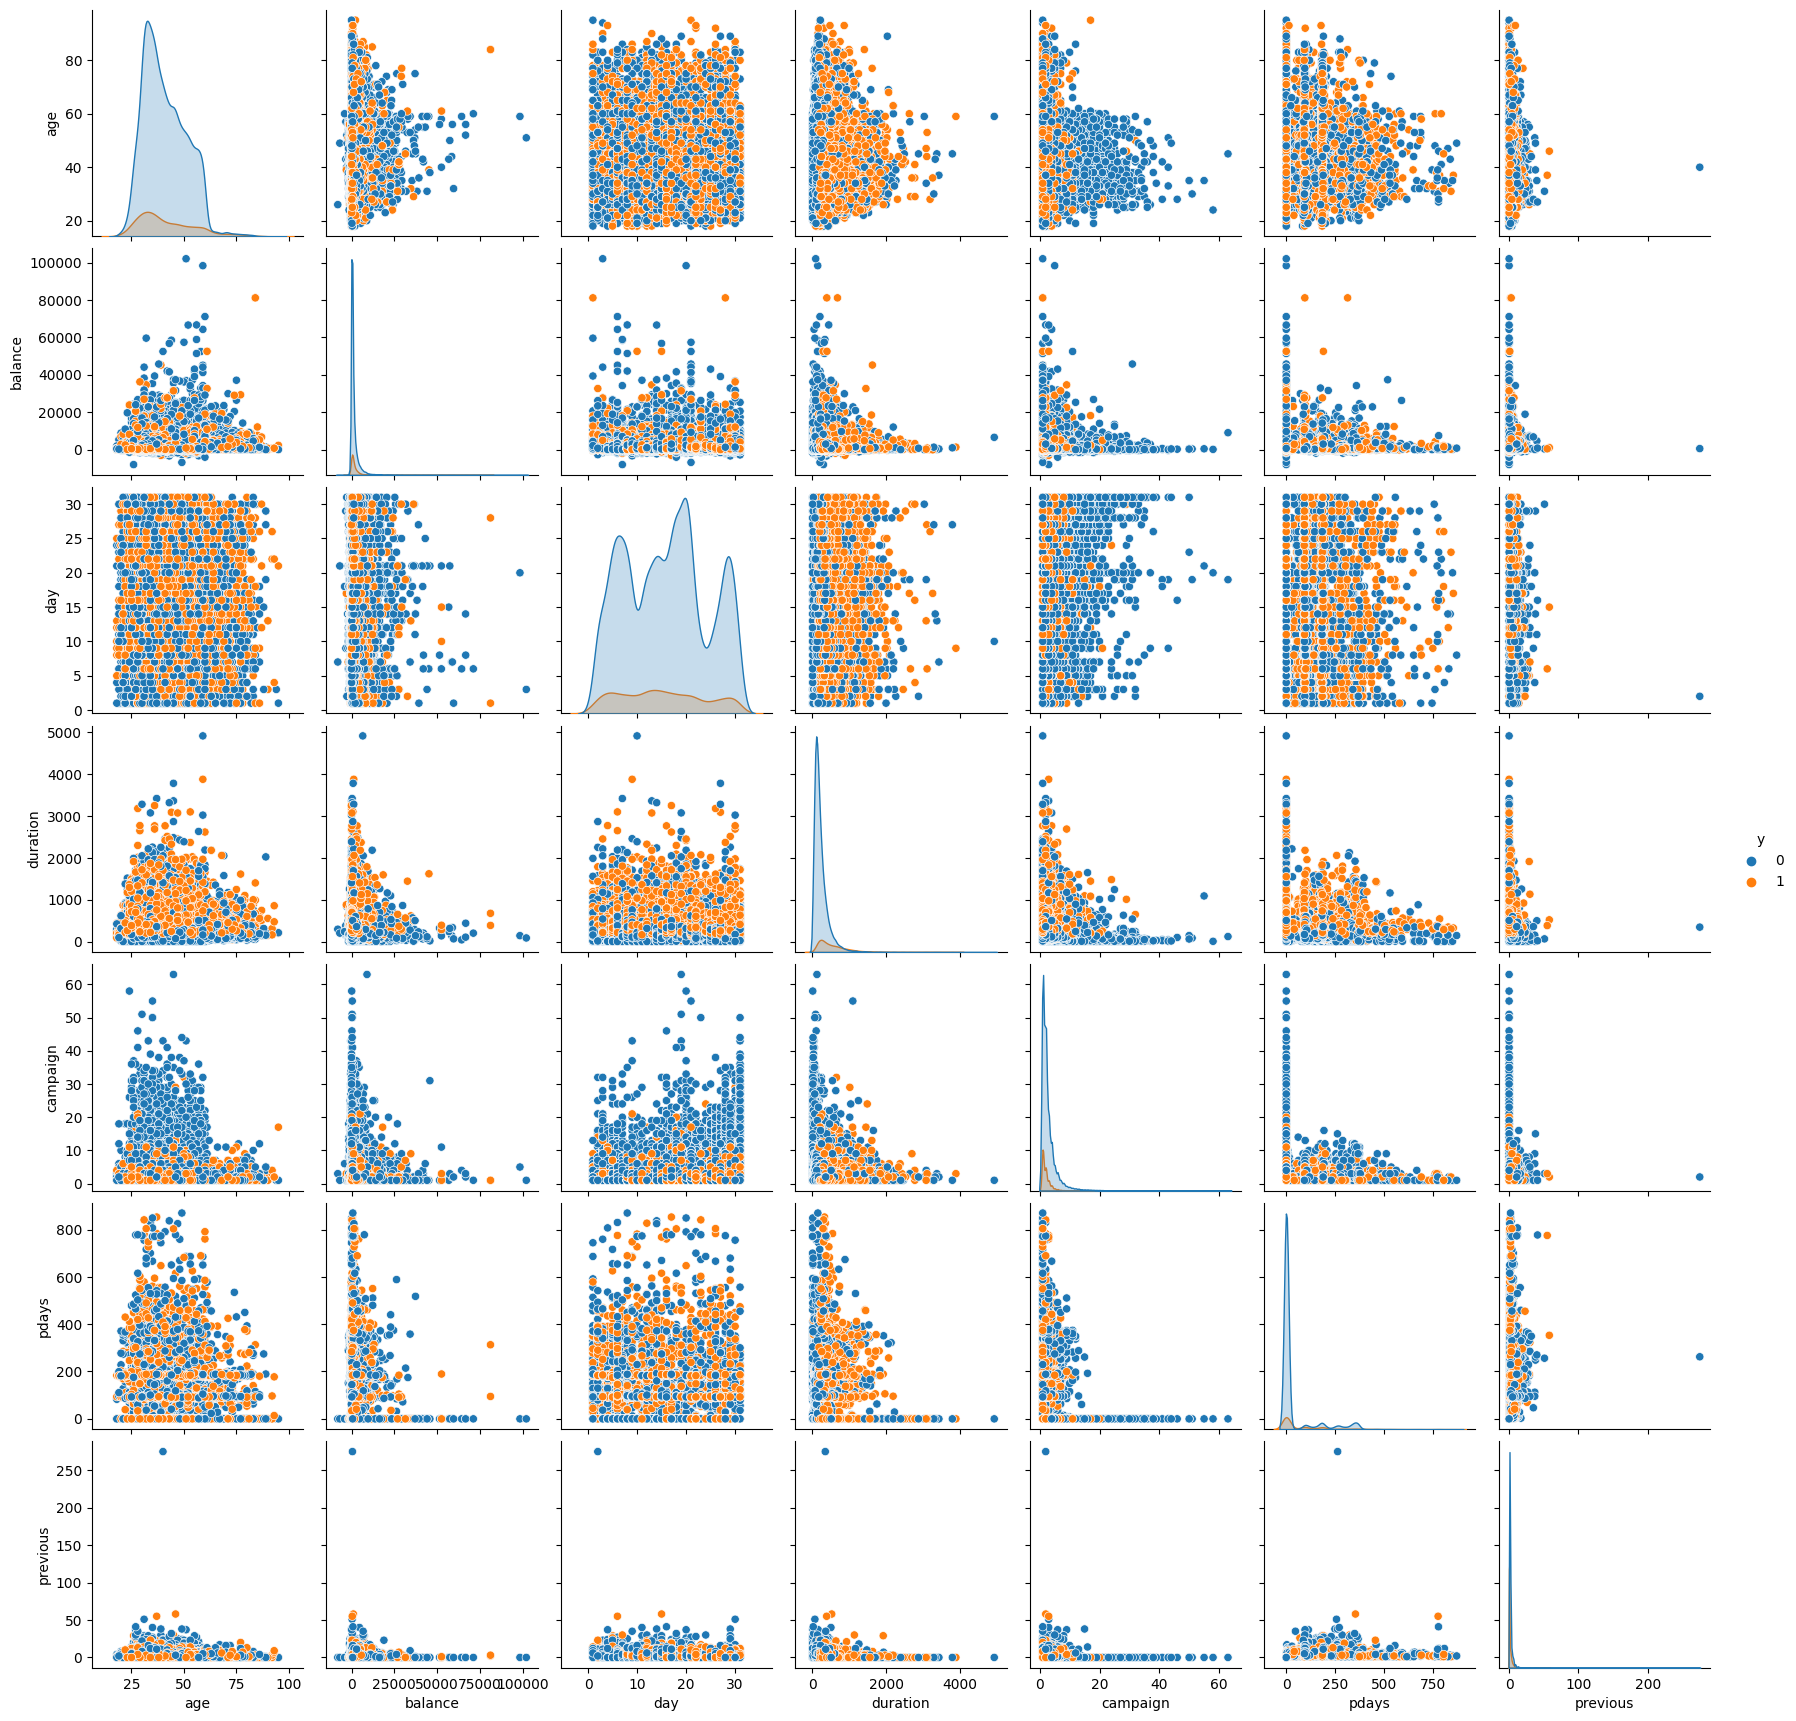

In [ ]:
#pairplot with target as hue
df=sns.pairplot(data, hue='y')


In [ ]:
#newcell
print('Shape of the data before Variance Thresholding', data.shape)
cols = set(data.columns)

Shape of the data before Variance Thresholding (45211, 17)


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
temp = ord_enc.fit_transform(data)
temp_df = pd.DataFrame(temp, columns = data.columns)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
var = VarianceThreshold(threshold=0.1)
var.fit(temp_df.drop('y', axis=1))
features_in = var.get_feature_names_out()

In [ ]:
features_in = list(var.get_feature_names_out())
features_in.append('y')
data = data[features_in]
print('Shape of the data after Variance Thresholding', data.shape)

Shape of the data after Variance Thresholding (45211, 16)


In [ ]:
new_cols = set(data.columns)
print(f'Removed Columns {cols.difference(new_cols)}')

Removed Columns {'default'}


<ipython-input-20-f5deb1a71c6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['y'] = data['y'].map({'yes':1, 'no':0})


Text(0.5, 1.0, 'Correlation Plot')

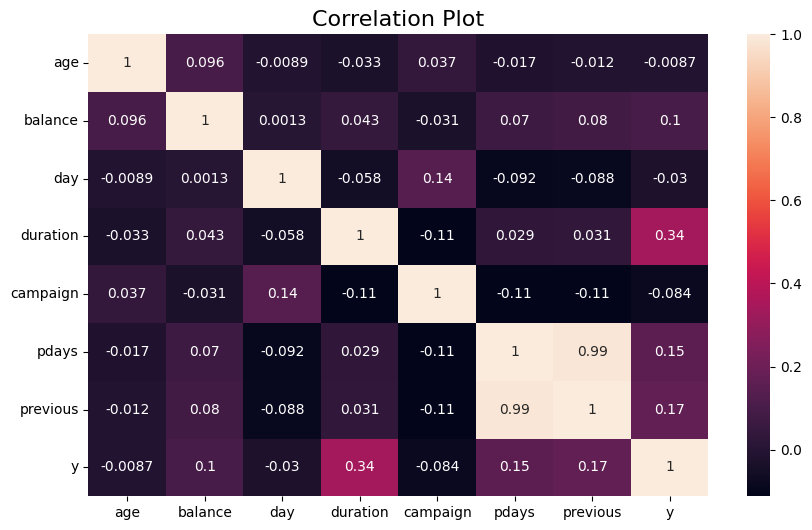

In [ ]:
data['y'] = data['y'].map({'yes':1, 'no':0})
corr = data.corr(method='spearman')
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True)
plt.title('Correlation Plot', size=16)